# Data Cleaning & Preprocessing

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
df_campaign_new = pd.read_csv('data/marketing_campaign_preparation.csv')
df_campaign_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0,1617000,25,0,0.142857,61-70,50M-60M,1.5M-2M,20-30
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2,27000,6,0,0.000000,61-70,40M-50M,0-0.5M,0-10
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0,776000,21,0,0.000000,51-60,70M-80M,0.5M-1M,20-30
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1,53000,8,0,0.000000,31-40,20M-30M,0-0.5M,0-10
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1,422000,19,0,0.000000,41-50,50M-60M,0-0.5M,10-20


In [3]:
df_campaign_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Values

In [4]:
# view number of missing values
null_cols = df_campaign_new.columns[df_campaign_new.isnull().any()]
df_null = df_campaign_new[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['kolom', 'jumlah']
df_null['persentase'] = round(df_null['jumlah']/len(df_campaign_new) * 100, 3)
df_null

,kolom,jumlah,persentase
0,Income,24,1.071
1,IncomeGroup,24,1.071


In [5]:
df_campaign_new['Income'].median()

51381500.0

In [6]:
df_campaign_new['Income'].fillna(df_campaign_new['Income'].median(), inplace=True)
df_campaign_new['IncomeGroup'].fillna('50M-60M', inplace=True)

print(f'Apakah masih terdapat nilai null? {df_campaign_new.isnull().any().any()}')

Apakah masih terdapat nilai null? False


## Duplicate Data

In [7]:
print(f"Apakah terdapat data yang duplikat? {df_campaign_new.drop('ID', axis=1).duplicated().any()}")
print(f"Jumlah data yang duplikat sebanyak {(df_campaign_new.drop('ID', axis=1)).duplicated().sum()} baris")

Apakah terdapat data yang duplikat? True
Jumlah data yang duplikat sebanyak 183 baris


In [8]:
# remove duplicate rows
print(f'Jumlah data sebelum difilter duplikasi adalah {len(df_campaign_new)} baris')
df_campaign_new.drop('ID', axis=1, inplace=True)
df_campaign_new.drop_duplicates(inplace=True)
print(f'Jumlah data setelah difilter duplikasi adalah {len(df_campaign_new)} baris')

Jumlah data sebelum difilter duplikasi adalah 2240 baris
Jumlah data setelah difilter duplikasi adalah 2057 baris


## Outlier Data

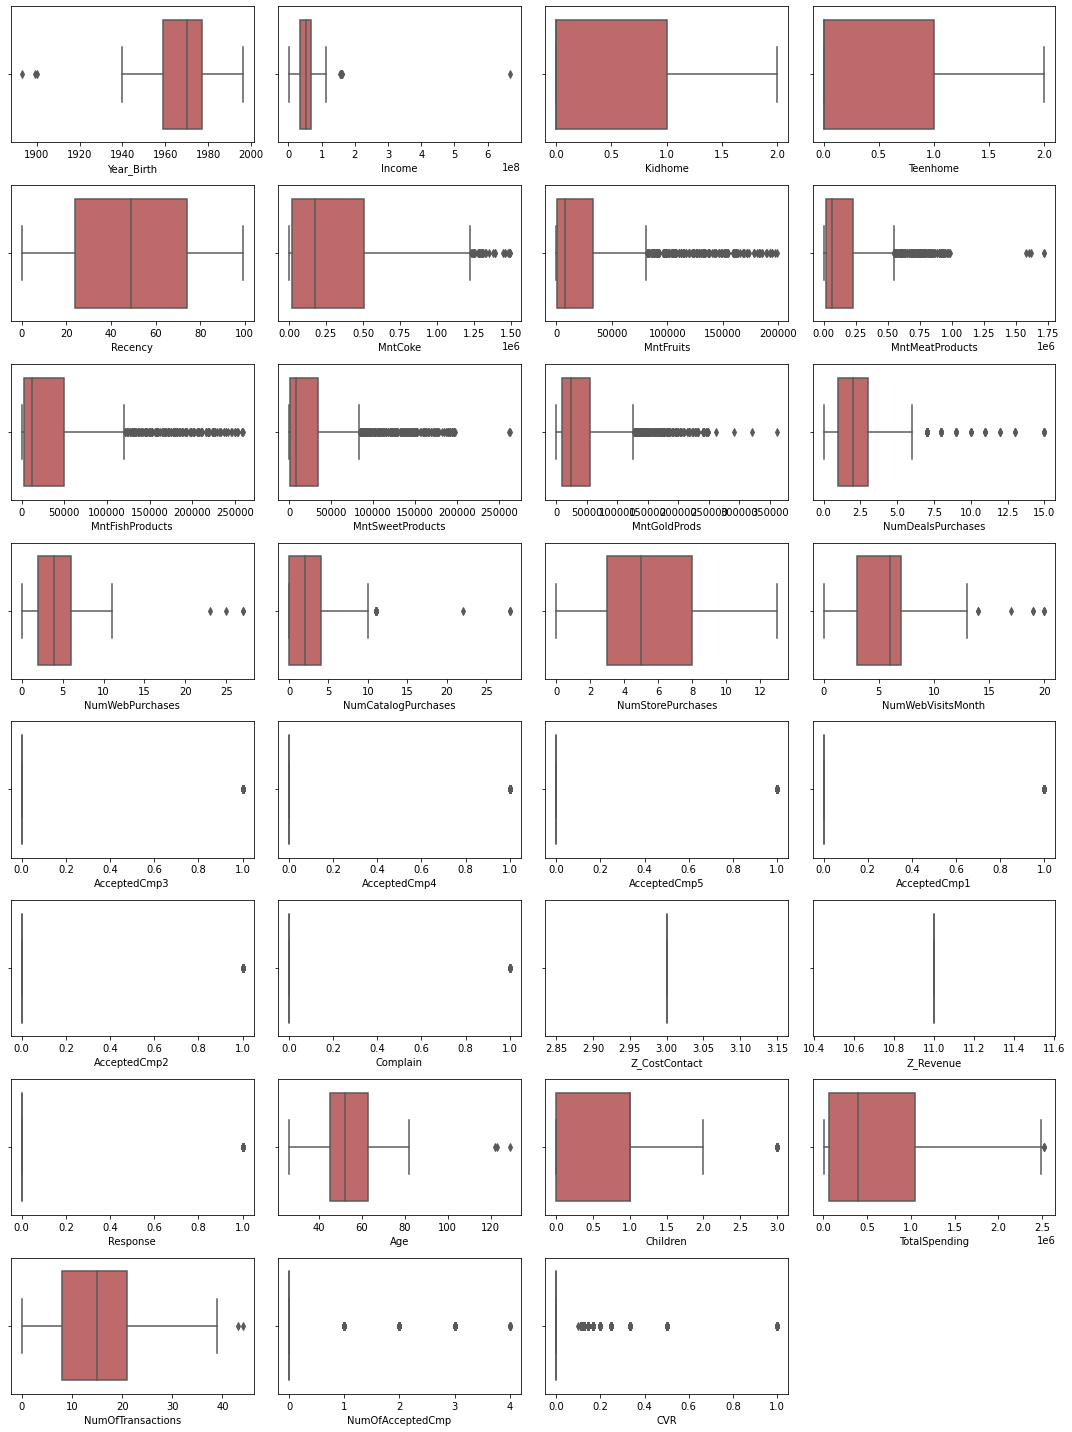

In [9]:
num_cols = df_campaign_new.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_campaign_new[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [10]:
# view total rows before filtered
print(f'Jumlah baris sebelum difilter outlier adalah {len(df_campaign_new)}')

# handle outlier using filtering based on EDA
filtered_entries = (df_campaign_new['Income']>600000000) | (df_campaign_new['Age']>80) | (df_campaign_new['NumOfTransactions']>40)  
df_campaign_new = df_campaign_new[~filtered_entries]

# view total rows after filtered
print(f'Jumlah baris setelah difilter outlier adalah {len(df_campaign_new)}')

Jumlah baris sebelum difilter outlier adalah 2057
Jumlah baris setelah difilter outlier adalah 2049


## Remove Unnecessary Columns

In [11]:
print(f'Before Filtered are {df_campaign_new.shape[1]} columns')
remove_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
               'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
               'Z_CostContact', 'Z_Revenue']
df_campaign_new.drop(columns=remove_cols, axis=1, inplace=True)
print(f'After Filtered are {df_campaign_new.shape[1]} columns')

Before Filtered are 38 columns
After Filtered are 17 columns


In [12]:
df_campaign_new.to_csv('data/marketing_campaign_cleaned.csv', index=False)
df_campaign_cleaned = df_campaign_new.copy()
df_campaign_cleaned.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup
0,S1,Lajang,58138000.0,58,7,0,1,65,0,1617000,25,0,0.142857,61-70,50M-60M,1.5M-2M,20-30
1,S1,Lajang,46344000.0,38,5,0,0,68,2,27000,6,0,0.000000,61-70,40M-50M,0-0.5M,0-10
2,S1,Bertunangan,71613000.0,26,4,0,0,57,0,776000,21,0,0.000000,51-60,70M-80M,0.5M-1M,20-30
3,S1,Bertunangan,26646000.0,26,6,0,0,38,1,53000,8,0,0.000000,31-40,20M-30M,0-0.5M,0-10
4,S3,Menikah,58293000.0,94,5,0,0,41,1,422000,19,0,0.000000,41-50,50M-60M,0-0.5M,10-20


# Preprocessing

## Feature Encoding

In [13]:
cat_cols = df_campaign_cleaned.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f'Jumlah nilai unik dari kolom {col} ada {df_campaign_cleaned[col].nunique()}:')
    print(sorted(df_campaign_cleaned[col].unique().tolist()))
    print('\n')

Jumlah nilai unik dari kolom Education ada 5:
['D3', 'S1', 'S2', 'S3', 'SMA']


Jumlah nilai unik dari kolom Marital_Status ada 6:
['Bertunangan', 'Cerai', 'Duda', 'Janda', 'Lajang', 'Menikah']


Jumlah nilai unik dari kolom AgeGroup ada 6:
['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']


Jumlah nilai unik dari kolom IncomeGroup ada 11:
['0M-10M', '10M-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M-70M', '70M-80M', '80M-90M', '90M-100M', '>100M']


Jumlah nilai unik dari kolom SpendingGroup ada 6:
['0-0.5M', '0.5M-1M', '1.5M-2M', '1M-1.5M', '2M-2.5M', '>2.5M']


Jumlah nilai unik dari kolom TransactionGroup ada 4:
['0-10', '10-20', '20-30', '30-40']




In [14]:
encode_cols = ['Education', 'Marital_Status', 'AgeGroup', 'IncomeGroup', 'SpendingGroup', 'TransactionGroup']
df_campaign_cleaned[encode_cols].head()

,Education,Marital_Status,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup
0,S1,Lajang,61-70,50M-60M,1.5M-2M,20-30
1,S1,Lajang,61-70,40M-50M,0-0.5M,0-10
2,S1,Bertunangan,51-60,70M-80M,0.5M-1M,20-30
3,S1,Bertunangan,31-40,20M-30M,0-0.5M,0-10
4,S3,Menikah,41-50,50M-60M,0-0.5M,10-20


In [15]:
# Label Encoding
education_enc = {'SMA':0, 'D3':1, 'S1':2, 'S2':3, 'S3':4}
age_enc = {'20-30':0, '31-40':1, '41-50':2, '51-60':3, '61-70':4, '71-80':5}
income_enc = {'0M-10M':0, '10M-20M':1, '20M-30M':2, '30M-40M':3, '40M-50M':4, '50M-60M':5,
              '60M-70M':6, '70M-80M':7, '80M-90M':8, '90M-100M':9, '>100M':10}
spending_enc = {'0-0.5M':0, '0.5M-1M':1, '1M-1.5M':2, '1.5M-2M':3, '2M-2.5M':4, '>2.5M':5}
trx_enc = {'0-10':0, '10-20':1, '20-30':2, '30-40':3}

df_campaign_cleaned['Education'] = df_campaign_cleaned['Education'].map(education_enc)
df_campaign_cleaned['AgeGroup'] = df_campaign_cleaned['AgeGroup'].map(age_enc)
df_campaign_cleaned['IncomeGroup'] = df_campaign_cleaned['IncomeGroup'].map(income_enc)
df_campaign_cleaned['SpendingGroup'] = df_campaign_cleaned['SpendingGroup'].map(spending_enc)
df_campaign_cleaned['TransactionGroup'] = df_campaign_cleaned['TransactionGroup'].map(trx_enc)

# One Hot Encoding
status_enc = pd.get_dummies(df_campaign_cleaned['Marital_Status'], prefix='MaritalStatus')
df_campaign_cleaned = pd.concat([df_campaign_cleaned, status_enc], axis=1)
df_campaign_cleaned.drop('Marital_Status', axis=1, inplace=True)

In [16]:
df_campaign_cleaned.iloc[:5,([0]+list(np.arange(-10, 0)))]

,Education,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah
0,2,4,5,3,2,0,0,0,0,1,0
1,2,4,4,0,0,0,0,0,0,1,0
2,2,3,7,1,2,1,0,0,0,0,0
3,2,1,2,0,0,1,0,0,0,0,0
4,4,2,5,0,1,0,0,0,0,0,1


## Feature Scaling

In [17]:
scale_cols = ['Income', 'Recency', 'NumWebVisitsMonth','Age', 'TotalSpending', 'NumOfTransactions']
df_campaign_cleaned[scale_cols].head()

,Income,Recency,NumWebVisitsMonth,Age,TotalSpending,NumOfTransactions
0,58138000.0,58,7,65,1617000,25
1,46344000.0,38,5,68,27000,6
2,71613000.0,26,4,57,776000,21
3,26646000.0,26,6,38,53000,8
4,58293000.0,94,5,41,422000,19


In [18]:
# scaling using standardization
for col in scale_cols:
    df_campaign_cleaned[col] = StandardScaler().fit_transform(df_campaign_cleaned[col].values.reshape(-1, 1))

In [19]:
df_campaign_cleaned[scale_cols].head()

,Income,Recency,NumWebVisitsMonth,Age,TotalSpending,NumOfTransactions
0,0.288624,0.311959,0.686577,1.022565,1.684059,1.332699
1,-0.264992,-0.378363,-0.134431,1.280313,-0.961651,-1.162050
2,0.921147,-0.792557,-0.544934,0.335236,0.284661,0.807488
3,-1.189626,-0.792557,0.276073,-1.297169,-0.918388,-0.899445
4,0.295900,1.554540,-0.134431,-1.039421,-0.304384,0.544883


In [20]:
df_campaign_cleaned.to_csv('data/marketing_campaign_modelling.csv', index=False)